# Actividad en clase 4: Teoría Moderna de Portafolio de Markowitz
#### Luis Eduardo Jiménez del Muro
#### 31/01/2025
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import seaborn as sns
import random
import itertools

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

symbol_list = ["AAPL", "MSFT", "F", "NFLX", "BAC", "NKE", "V", "DIS"]

n_tickers_selected = 4
n_combinations = 20
sampled_combinations = random.sample(list(itertools.combinations(symbol_list, n_tickers_selected)), n_combinations)


In [3]:
all_portfolios = []

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    #print(data.head())
    returns = data.pct_change().dropna()
    #print(returns.head())
    covariance_matrix = returns.cov()
    #print(covariance_matrix)

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights = np.random.random(n_tickers_selected)
        weights = weights / np.sum(weights)

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        # guardando historicos
        weights_array[i, :] = weights
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk


    portfolios = pd.DataFrame({
        "Return": returns_array,
        "Risk": risk_array
    })
    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]


    all_portfolios.append(portfolios)

YF.download() has changed argument auto_adjust default to True


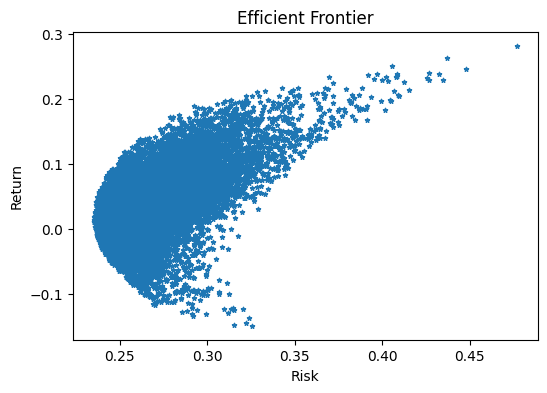

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(all_portfolios[0]["Risk"], all_portfolios[0]["Return"], marker= "*", s=10)

plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Efficient Frontier")

plt.show()

# 1. Calcular el Ratio de Sharpe para cada portafolio

In [5]:
rf = 0.0432 # Tasa libre de riesgo de USA
for i in range(len(all_portfolios   )):
    all_portfolios[i]['Sharpe'] =  (all_portfolios[i]['Return'] - rf )/ all_portfolios[i]['Risk']

In [6]:
all_portfolios[0].head()

,Return,Risk,AAPL Weight,NFLX Weight,NKE Weight,DIS Weight,Sharpe
0,0.049300,0.272300,0.173646,0.468385,0.257878,0.100091,0.022400
1,0.016356,0.291531,0.060559,0.200527,0.322716,0.416198,-0.092079
2,0.177663,0.318644,0.385988,0.037124,0.489182,0.087705,0.421984
3,0.141518,0.298800,0.312076,0.267392,0.409145,0.011388,0.329042
4,0.069345,0.274206,0.345106,0.052006,0.279319,0.323569,0.095350


# 2. Para cada selección de activos, graficar el portafolio que maximiza el ratio de Sharpe

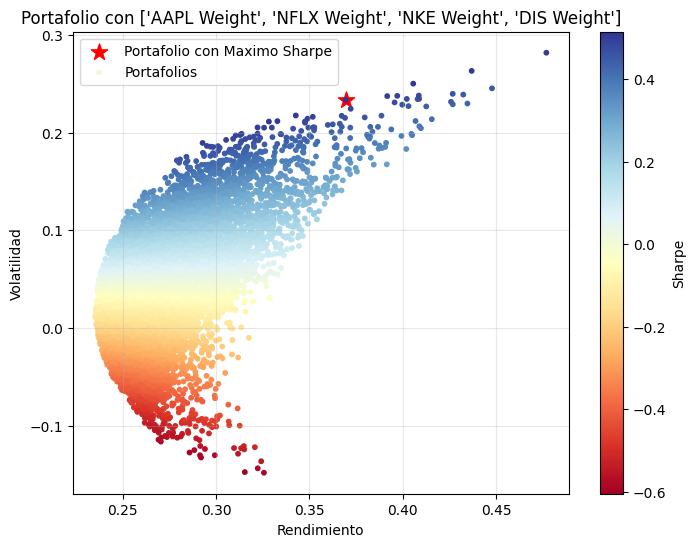

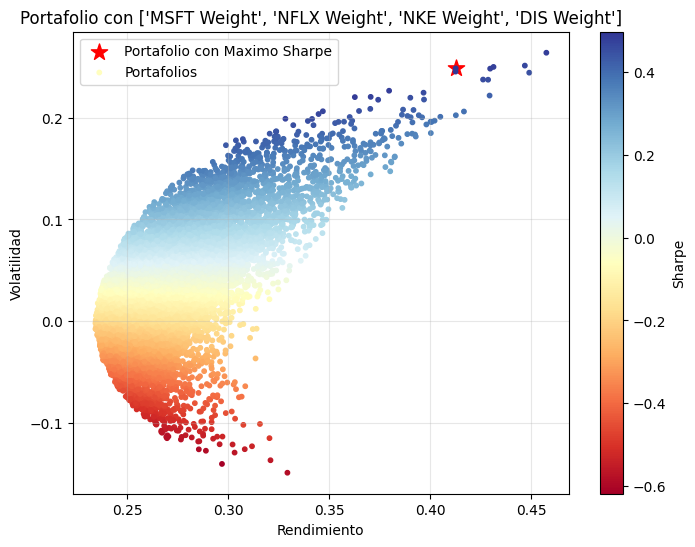

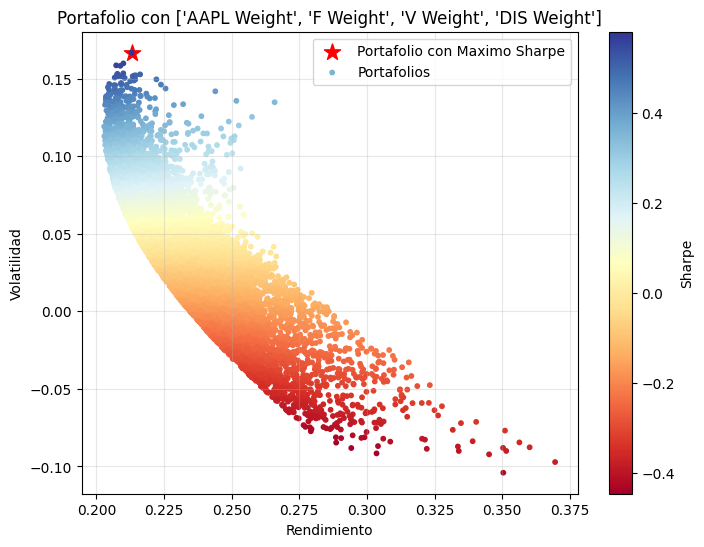

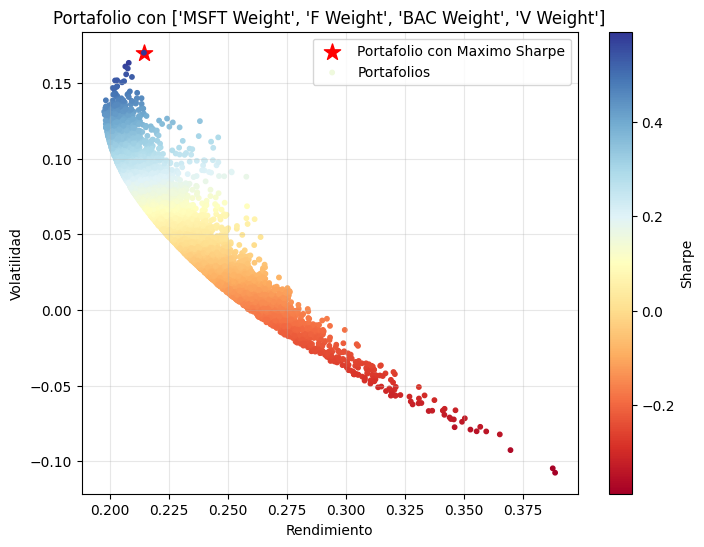

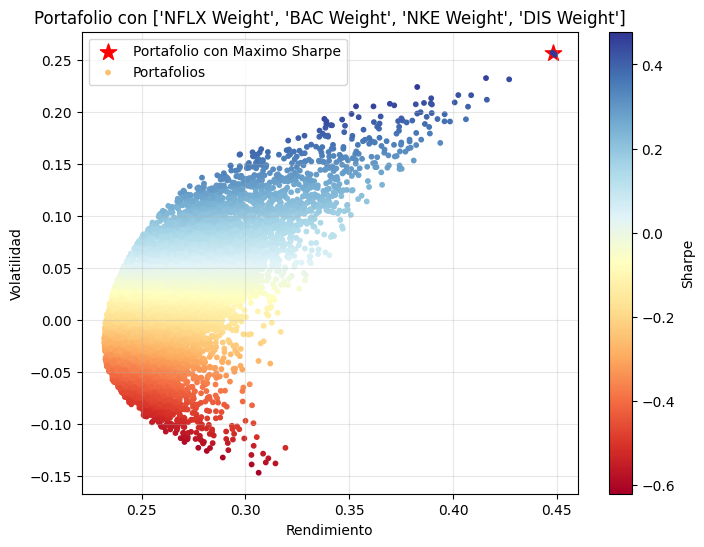

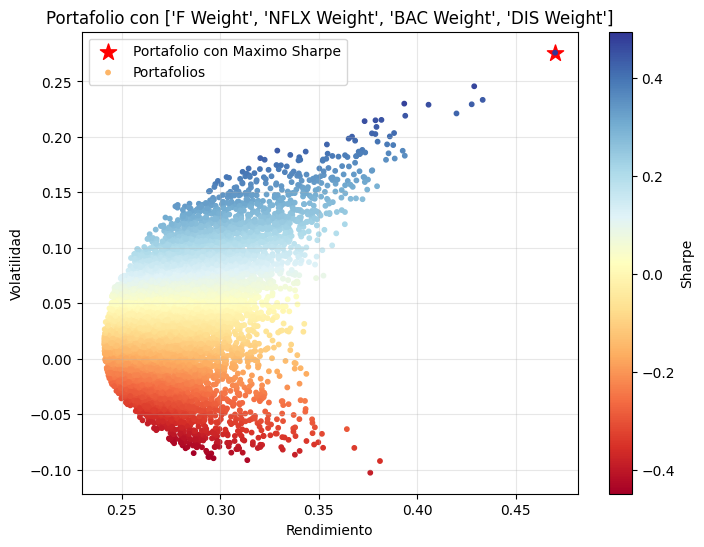

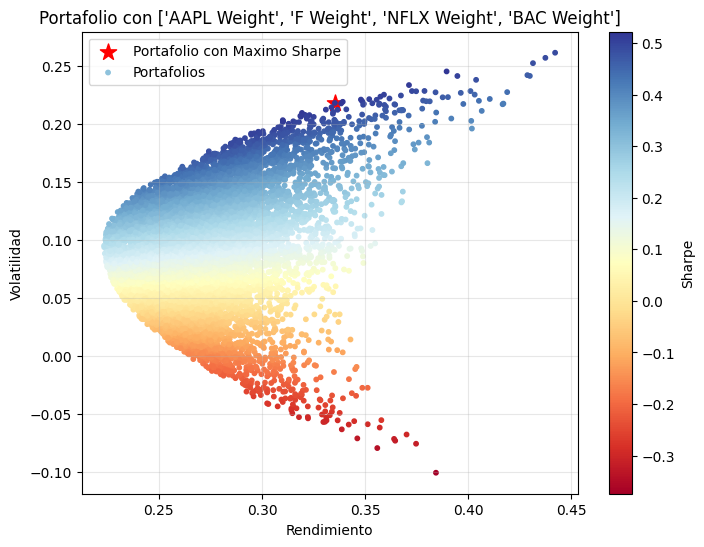

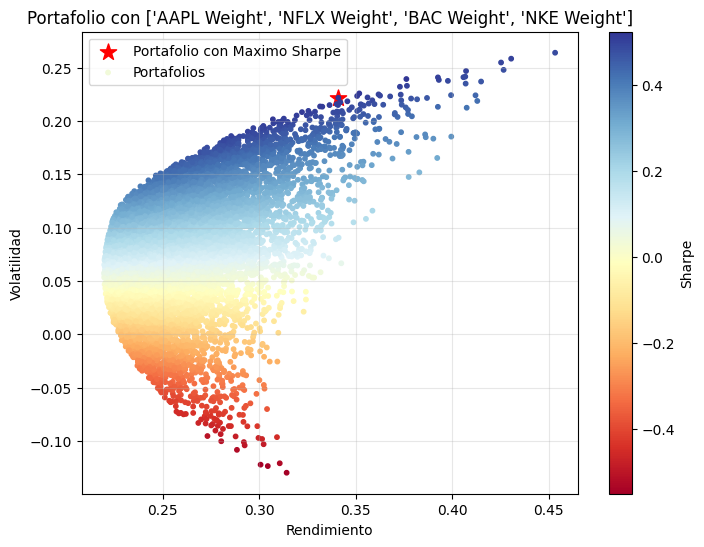

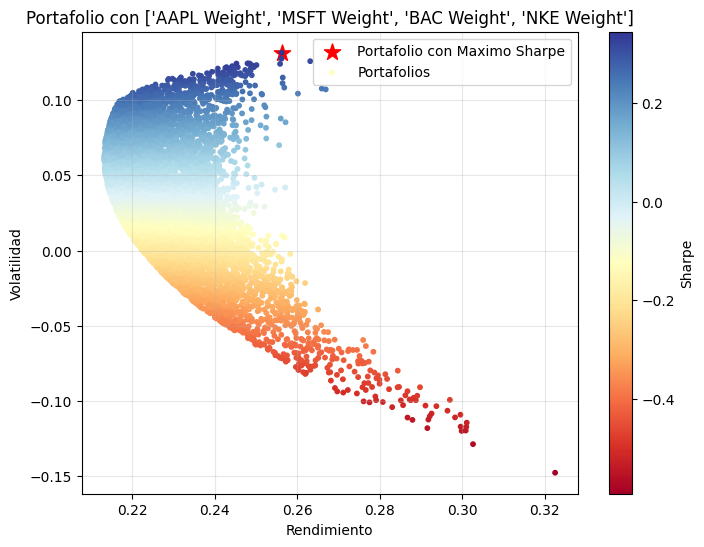

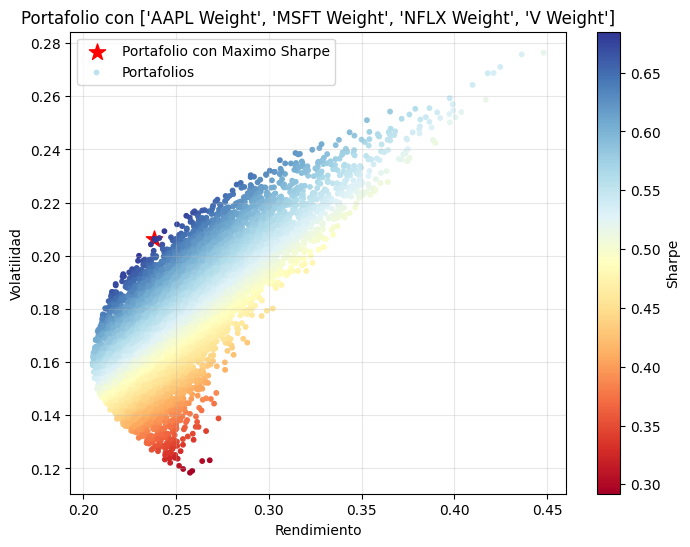

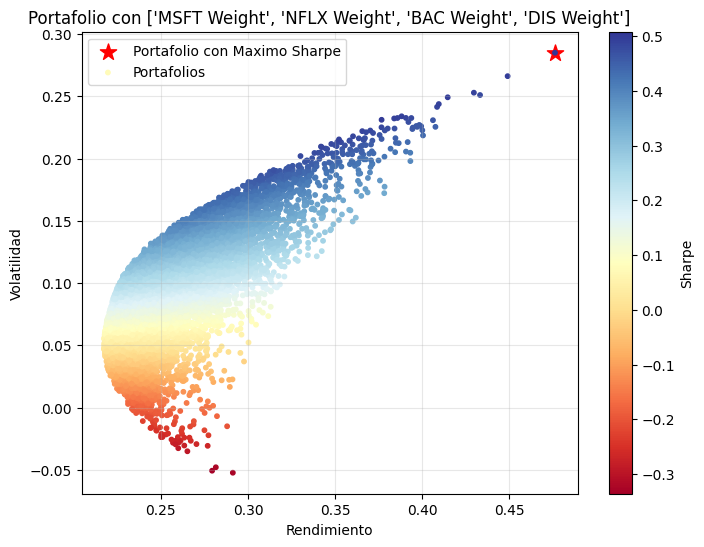

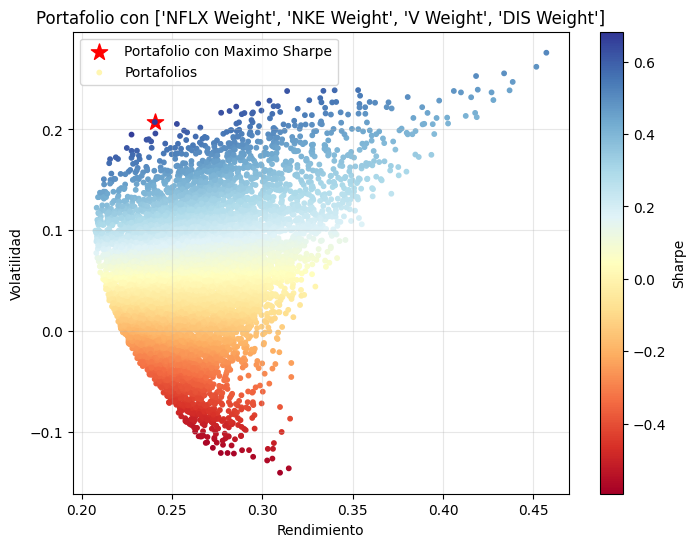

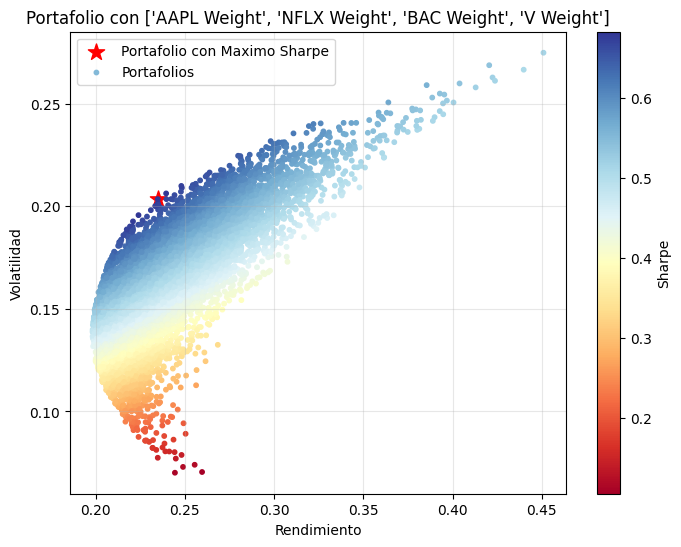

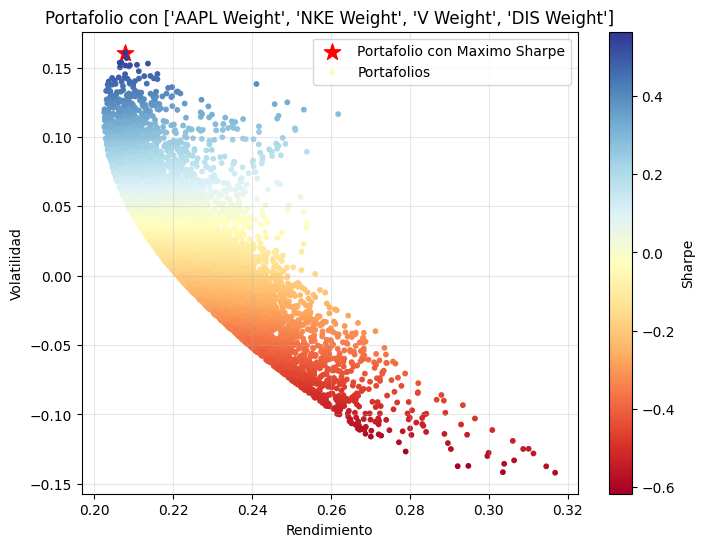

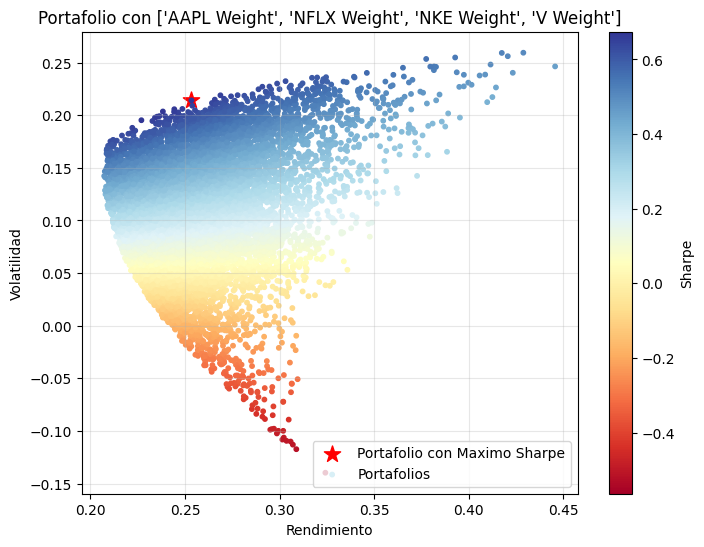

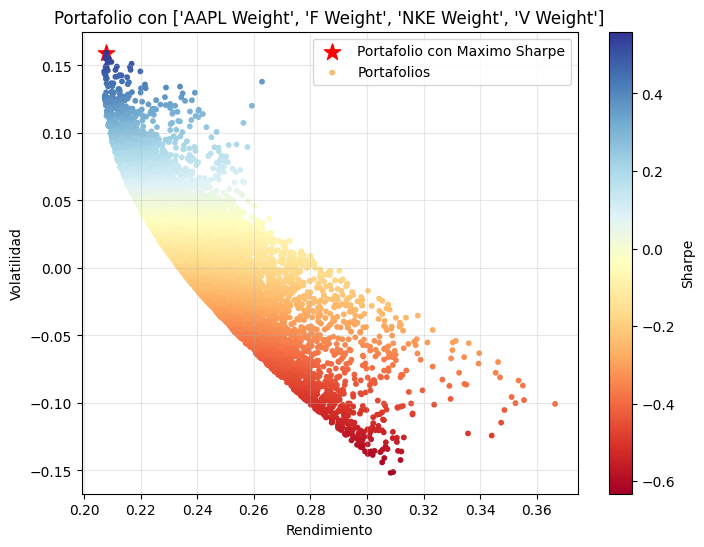

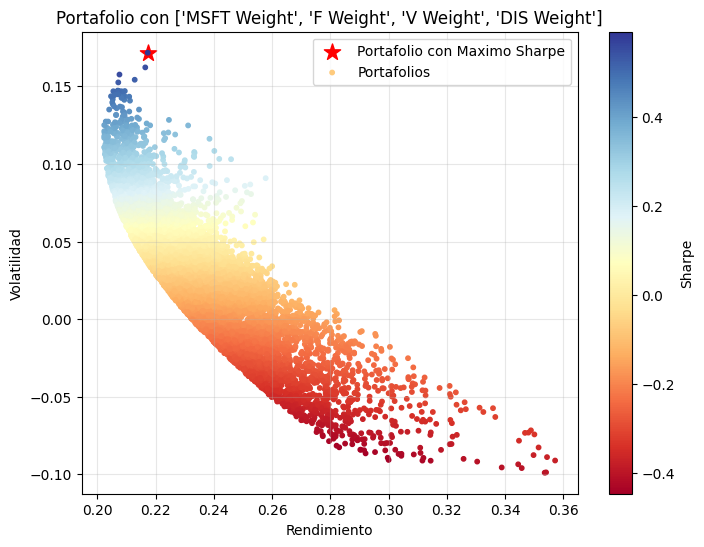

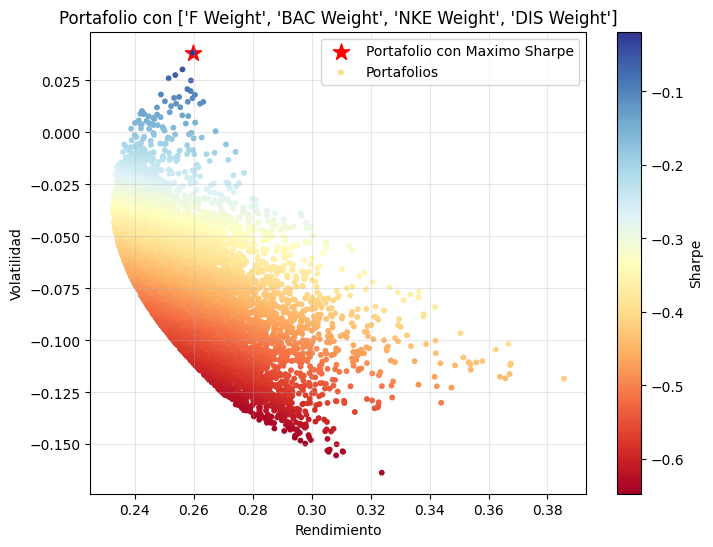

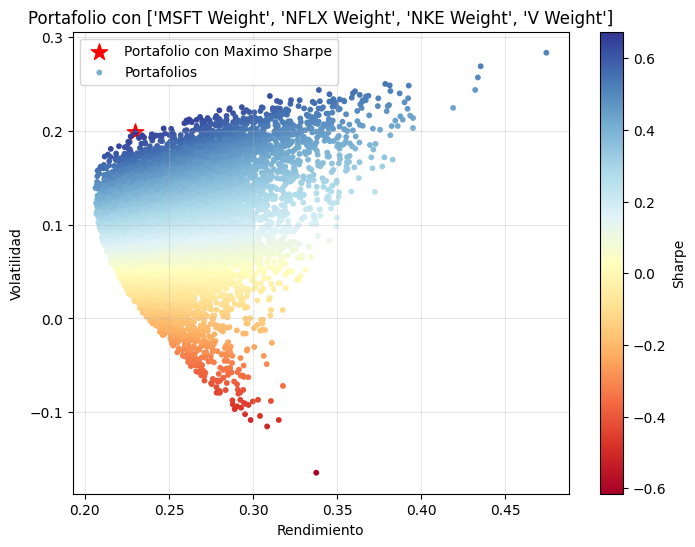

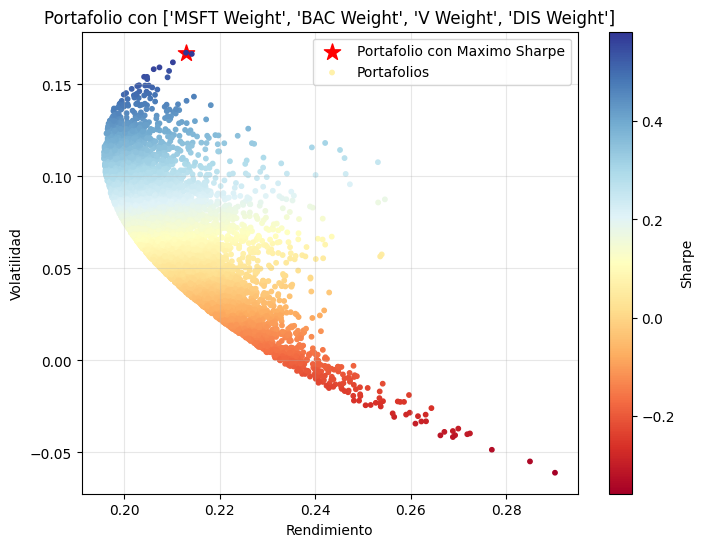

In [9]:
for i in range(len(all_portfolios)):
    plt.figure(figsize=(8,6))

    plt.scatter(all_portfolios[i][all_portfolios[i]['Sharpe'] == all_portfolios[i]['Sharpe'].max()][['Risk']],
                all_portfolios[i][all_portfolios[i]['Sharpe'] == all_portfolios[i]['Sharpe'].max()][['Return']], 
                color='r', marker='*', s=150, label='Portafolio con Maximo Sharpe')
    
    plt.scatter(all_portfolios[i]['Risk'], all_portfolios[i]['Return'], c=all_portfolios[i]['Sharpe'], 
                cmap = 'RdYlBu', label = 'Portafolios', s=10)

    plt.title(f'Portafolio con {all_portfolios[i].columns.tolist()[2:-1]}')
    plt.grid(alpha=0.3)
    plt.xlabel('Rendimiento')
    plt.ylabel('Volatilidad')
    plt.legend(loc='best')
    plt.colorbar(label='Sharpe')
    plt.show()

# 3. Obtener los 10 portafolios preferibles de todos los portafolios generados

In [11]:
from IPython.display import display_markdown

for i in range(len(all_portfolios)):
    display_markdown(f'### **Portafolio {i+1}**', raw=True)
    display(all_portfolios[i].sort_values('Sharpe', ascending=False).head(10))

### **Portafolio 1**

,Return,Risk,AAPL Weight,NFLX Weight,NKE Weight,DIS Weight,Sharpe
2116,0.233419,0.369361,0.320953,0.012216,0.658902,0.007929,0.514994
837,0.211280,0.328264,0.468016,0.008352,0.513148,0.010484,0.512027
4640,0.250099,0.405614,0.204736,0.013995,0.772610,0.008659,0.510089
7949,0.217487,0.342672,0.402666,0.018129,0.568267,0.010938,0.508613
1343,0.211715,0.332814,0.441596,0.008199,0.531869,0.018335,0.506333
7469,0.263157,0.436934,0.109858,0.013919,0.864572,0.011651,0.503410
6827,0.205268,0.322172,0.472436,0.033682,0.491513,0.002369,0.503046
1084,0.281749,0.476960,0.004866,0.006843,0.976854,0.011438,0.500145
6517,0.189404,0.292723,0.647620,0.000720,0.346946,0.004713,0.499463
7049,0.205010,0.325671,0.454603,0.018946,0.506239,0.020212,0.496850


### **Portafolio 2**

,Return,Risk,MSFT Weight,NFLX Weight,NKE Weight,DIS Weight,Sharpe
772,0.248677,0.412542,0.019830,0.189942,0.789640,0.000587,0.498075
7955,0.245508,0.412489,0.032218,0.173929,0.789808,0.004045,0.490456
9536,0.220398,0.362668,0.002155,0.358505,0.629457,0.009883,0.488597
9172,0.226671,0.379615,0.029868,0.275464,0.687566,0.007102,0.483309
7594,0.264068,0.457388,0.005954,0.031900,0.922623,0.039523,0.482890
9801,0.250092,0.431249,0.018685,0.101298,0.847151,0.032867,0.479752
2034,0.220627,0.370501,0.026827,0.303411,0.658105,0.011657,0.478883
8919,0.248400,0.429596,0.035542,0.098188,0.841617,0.024653,0.477658
9609,0.199101,0.328324,0.001171,0.495934,0.499648,0.003246,0.474839
6208,0.206472,0.346849,0.036831,0.384003,0.576012,0.003154,0.470729


### **Portafolio 3**

,Return,Risk,AAPL Weight,F Weight,V Weight,DIS Weight,Sharpe
1593,0.166748,0.213038,0.066162,0.016674,0.013237,0.903926,0.579933
3308,0.158598,0.207327,0.264056,0.010776,0.019627,0.705541,0.556599
1352,0.159868,0.209987,0.136031,0.004794,0.037299,0.821877,0.555595
868,0.158298,0.208852,0.179494,0.000994,0.040050,0.779461,0.551098
314,0.153136,0.207784,0.356435,0.023380,0.015388,0.604796,0.529089
3622,0.152622,0.207699,0.361603,0.029151,0.011622,0.597624,0.526828
9101,0.153462,0.209954,0.404144,0.006554,0.022037,0.567266,0.525171
2206,0.151837,0.207668,0.223254,0.006718,0.051416,0.718612,0.523128
2404,0.151635,0.207956,0.172048,0.017660,0.049735,0.760556,0.521433
7137,0.150731,0.206781,0.232486,0.021127,0.041890,0.704497,0.520024


### **Portafolio 4**

,Return,Risk,MSFT Weight,F Weight,BAC Weight,V Weight,Sharpe
5637,0.169971,0.214402,0.048939,0.002405,0.008126,0.940530,0.591274
7338,0.163287,0.207975,0.062509,0.000201,0.092294,0.844996,0.577413
2282,0.160878,0.206532,0.063167,0.001850,0.119790,0.815192,0.569781
9907,0.159553,0.207559,0.058688,0.013159,0.098246,0.829907,0.560577
4512,0.155697,0.206887,0.007804,0.004924,0.286799,0.700473,0.543758
4065,0.151633,0.202179,0.103874,0.004381,0.170842,0.720902,0.536322
7869,0.151764,0.203057,0.069575,0.006711,0.222559,0.701154,0.534648
6028,0.153956,0.209332,0.011805,0.046862,0.121124,0.820208,0.529094
4813,0.151149,0.206021,0.018230,0.014354,0.293851,0.673565,0.523969
4657,0.150406,0.205119,0.036029,0.005559,0.310401,0.648011,0.522652


### **Portafolio 5**

,Return,Risk,NFLX Weight,BAC Weight,NKE Weight,DIS Weight,Sharpe
8708,0.257319,0.448031,0.035063,0.061122,0.898126,0.005689,0.477911
6554,0.224294,0.382764,0.246040,0.003387,0.737091,0.013482,0.473121
694,0.255309,0.449196,0.024938,0.051240,0.900924,0.022897,0.472198
3472,0.205684,0.353264,0.337287,0.000641,0.653118,0.008955,0.459951
1650,0.232882,0.415900,0.103305,0.034304,0.818149,0.044242,0.456075
8094,0.205622,0.361676,0.274419,0.047554,0.673051,0.004976,0.449081
9812,0.208130,0.369568,0.238396,0.055889,0.694125,0.011591,0.446277
1278,0.193579,0.338014,0.377260,0.007999,0.605873,0.008868,0.444890
7557,0.198345,0.351090,0.306509,0.043312,0.642671,0.007508,0.441895
8457,0.231684,0.427052,0.034475,0.084757,0.837736,0.043033,0.441360


### **Portafolio 6**

,Return,Risk,F Weight,NFLX Weight,BAC Weight,DIS Weight,Sharpe
7079,0.275891,0.470016,0.010271,0.017178,0.014095,0.958456,0.495070
1678,0.230000,0.393473,0.208434,0.006613,0.020427,0.764527,0.474746
955,0.245636,0.428970,0.082831,0.034658,0.030620,0.851891,0.471911
8834,0.214188,0.373352,0.250699,0.010923,0.030783,0.707595,0.457982
973,0.229010,0.405792,0.135067,0.015743,0.057642,0.791549,0.457896
7008,0.214965,0.378875,0.216180,0.043079,0.020662,0.720079,0.453357
1491,0.215339,0.381886,0.197162,0.066584,0.010113,0.726140,0.450760
455,0.219056,0.393977,0.157436,0.008144,0.075735,0.758685,0.446360
716,0.233389,0.433267,0.004372,0.070111,0.075238,0.850278,0.438964
7402,0.187637,0.329057,0.409919,0.009046,0.004684,0.576350,0.438942


### **Portafolio 7**

,Return,Risk,AAPL Weight,F Weight,NFLX Weight,BAC Weight,Sharpe
7496,0.218325,0.335351,0.410595,0.036240,0.002252,0.550912,0.522213
954,0.209692,0.319383,0.520446,0.001971,0.002472,0.475111,0.521293
4357,0.245490,0.389515,0.250942,0.015205,0.007392,0.726460,0.519337
7577,0.219307,0.339153,0.408085,0.021865,0.009171,0.560879,0.519255
3294,0.203456,0.310079,0.533474,0.020293,0.002228,0.444005,0.516824
5041,0.217880,0.338366,0.401993,0.025441,0.012862,0.559705,0.516245
7874,0.207078,0.318591,0.488599,0.019408,0.010597,0.481396,0.514383
5421,0.202679,0.310247,0.460873,0.070554,0.001884,0.466688,0.514037
6168,0.208033,0.320832,0.420231,0.065670,0.006752,0.507347,0.513768
4975,0.214579,0.333692,0.333808,0.099179,0.003359,0.563654,0.513584


### **Portafolio 8**

,Return,Risk,AAPL Weight,NFLX Weight,BAC Weight,NKE Weight,Sharpe
4274,0.221643,0.341021,0.383218,0.043299,0.573309,0.000174,0.523261
4436,0.239232,0.376298,0.308384,0.002314,0.681516,0.007786,0.520949
1413,0.225762,0.351883,0.374695,0.012304,0.603011,0.009990,0.518815
9437,0.201496,0.307108,0.516352,0.041891,0.441034,0.000723,0.515440
6478,0.213540,0.331575,0.359569,0.083354,0.552207,0.004870,0.513731
9660,0.223344,0.350787,0.333390,0.045836,0.609223,0.011550,0.513543
7697,0.208236,0.322187,0.478248,0.014867,0.494338,0.012547,0.512237
1552,0.213322,0.332716,0.332296,0.101684,0.561141,0.004879,0.511313
3807,0.209371,0.325517,0.409752,0.056306,0.522646,0.011297,0.510482
4118,0.214817,0.336472,0.333324,0.086938,0.570854,0.008885,0.510049


### **Portafolio 9**

,Return,Risk,AAPL Weight,MSFT Weight,BAC Weight,NKE Weight,Sharpe
2327,0.131496,0.256198,0.851417,0.040373,0.107074,0.001135,0.344639
4716,0.124296,0.245229,0.736703,0.081330,0.175094,0.006874,0.330693
4567,0.127490,0.256134,0.820332,0.014412,0.147734,0.017522,0.329086
1633,0.124396,0.247914,0.581350,0.012805,0.400673,0.005171,0.327518
9083,0.124250,0.248113,0.688412,0.029510,0.269227,0.012851,0.326667
9602,0.124274,0.248474,0.696493,0.028690,0.261082,0.013735,0.326287
3926,0.122589,0.244211,0.673938,0.060515,0.254589,0.010958,0.325081
9992,0.121915,0.242826,0.596878,0.053968,0.342093,0.007061,0.324164
8015,0.120960,0.240701,0.606607,0.074447,0.311732,0.007215,0.323054
5845,0.121428,0.242530,0.571103,0.052563,0.369812,0.006522,0.322551


### **Portafolio 10**

,Return,Risk,AAPL Weight,MSFT Weight,NFLX Weight,V Weight,Sharpe
3494,0.206348,0.238258,0.005103,0.017857,0.269356,0.707684,0.684756
3361,0.200024,0.230036,0.059856,0.013659,0.229778,0.696707,0.681738
9834,0.204313,0.236443,0.049893,0.012603,0.263697,0.673807,0.681405
278,0.209262,0.243732,0.024115,0.010343,0.297276,0.668266,0.681332
8887,0.205948,0.238956,0.000397,0.034529,0.274072,0.691002,0.681077
9697,0.206682,0.240972,0.065803,0.005844,0.286162,0.642191,0.678428
4479,0.193106,0.221497,0.102394,0.002857,0.176799,0.717950,0.676784
6806,0.198135,0.229495,0.036341,0.053800,0.228736,0.681123,0.675113
6497,0.192186,0.221158,0.073078,0.032959,0.176383,0.717581,0.673665
7914,0.211846,0.250522,0.062549,0.001388,0.328135,0.607929,0.673180


### **Portafolio 11**

,Return,Risk,MSFT Weight,NFLX Weight,BAC Weight,DIS Weight,Sharpe
4803,0.284986,0.476144,0.005392,0.002627,0.016836,0.975144,0.507801
6012,0.231130,0.376661,0.005548,0.003966,0.313332,0.677153,0.498936
9742,0.249195,0.414599,0.125093,0.005548,0.051783,0.817575,0.496853
1484,0.266171,0.448976,0.026795,0.026441,0.045601,0.901163,0.496621
7551,0.232199,0.383892,0.046514,0.019475,0.222293,0.711717,0.492323
7518,0.233935,0.388138,0.182453,0.001618,0.068659,0.747270,0.491409
3749,0.232572,0.385770,0.148954,0.008647,0.106469,0.735930,0.490893
5691,0.243761,0.409481,0.157711,0.013928,0.022157,0.806204,0.489792
2232,0.222019,0.365583,0.010055,0.018592,0.328822,0.642531,0.489135
7352,0.215391,0.352221,0.018429,0.008283,0.375185,0.598104,0.488871


### **Portafolio 12**

,Return,Risk,NFLX Weight,NKE Weight,V Weight,DIS Weight,Sharpe
307,0.207399,0.240563,0.005536,0.279009,0.000204,0.715251,0.682561
9236,0.194929,0.227666,0.013322,0.205186,0.006540,0.774952,0.666454
4940,0.205478,0.252752,0.000347,0.335888,0.027694,0.636072,0.642043
935,0.196009,0.240865,0.040247,0.283265,0.009698,0.666789,0.634417
4254,0.222689,0.285585,0.002516,0.457640,0.016268,0.523576,0.628497
1752,0.216589,0.277245,0.021069,0.428400,0.011213,0.539319,0.625399
3223,0.238135,0.313745,0.001050,0.547441,0.002138,0.449372,0.621318
5559,0.189804,0.235992,0.055706,0.259525,0.008892,0.675877,0.621222
4883,0.218325,0.281907,0.035127,0.443667,0.001286,0.519920,0.621216
2610,0.190345,0.237185,0.036201,0.265525,0.023004,0.675270,0.620383


### **Portafolio 13**

,Return,Risk,AAPL Weight,NFLX Weight,BAC Weight,V Weight,Sharpe
2066,0.203493,0.234824,0.065859,0.000891,0.255459,0.677791,0.682609
3346,0.206269,0.239505,0.014359,0.016907,0.279949,0.688784,0.680858
1722,0.195692,0.224030,0.070463,0.005060,0.192563,0.731914,0.680675
2923,0.192648,0.220934,0.041709,0.016442,0.168253,0.773596,0.676438
1621,0.201507,0.234852,0.081147,0.017455,0.261460,0.639938,0.674070
6181,0.200107,0.233373,0.122235,0.006888,0.251585,0.619292,0.672347
2700,0.209929,0.248011,0.073268,0.003997,0.318452,0.604283,0.672264
2892,0.198119,0.230934,0.102165,0.021378,0.243060,0.633396,0.670839
4183,0.190167,0.219261,0.045977,0.030600,0.163407,0.760015,0.670285
9773,0.200683,0.235169,0.134555,0.006124,0.260101,0.599220,0.669660


### **Portafolio 14**

,Return,Risk,AAPL Weight,NKE Weight,V Weight,DIS Weight,Sharpe
2958,0.160716,0.207854,0.195190,0.015289,0.014951,0.774571,0.565376
3323,0.156806,0.208217,0.171400,0.010637,0.032048,0.785915,0.545613
9622,0.153515,0.206437,0.216043,0.029347,0.023307,0.731303,0.534378
3398,0.153717,0.206842,0.274230,0.014889,0.026415,0.684466,0.534308
5661,0.151509,0.207871,0.190945,0.002440,0.050768,0.755846,0.521040
9693,0.151738,0.209043,0.404689,0.030811,0.006324,0.558177,0.519213
139,0.150188,0.206519,0.342409,0.048214,0.005449,0.603927,0.518055
5369,0.151981,0.210818,0.426341,0.005654,0.020912,0.547093,0.515998
8618,0.150845,0.208769,0.402319,0.036270,0.005296,0.556114,0.515619
312,0.152894,0.213597,0.485751,0.012176,0.007091,0.494982,0.513557


### **Portafolio 15**

,Return,Risk,AAPL Weight,NFLX Weight,NKE Weight,V Weight,Sharpe
6794,0.214097,0.253395,0.040033,0.339696,0.000077,0.620193,0.674429
8227,0.203551,0.238281,0.105752,0.273837,0.001635,0.618776,0.672947
4956,0.195240,0.226916,0.149742,0.214335,0.001280,0.634643,0.670025
3048,0.205691,0.244316,0.055010,0.301244,0.010019,0.633727,0.665084
6566,0.198621,0.235228,0.188174,0.255774,0.000703,0.555349,0.660724
6174,0.197672,0.234092,0.046147,0.250923,0.017684,0.685246,0.659880
9378,0.199126,0.236454,0.158924,0.263704,0.005080,0.572292,0.659434
9906,0.203175,0.244199,0.036525,0.300187,0.018926,0.644363,0.655102
7521,0.205958,0.248587,0.162737,0.316361,0.002121,0.518780,0.654730
6030,0.218930,0.268704,0.059413,0.398374,0.003037,0.539176,0.653989


### **Portafolio 16**

,Return,Risk,AAPL Weight,F Weight,NKE Weight,V Weight,Sharpe
3877,0.159412,0.207886,0.255050,0.026277,0.000671,0.718003,0.559016
9055,0.156193,0.207780,0.302732,0.006575,0.021114,0.669580,0.543810
5813,0.155173,0.207530,0.244724,0.012347,0.025644,0.717285,0.539550
1332,0.155106,0.208771,0.356875,0.023433,0.004011,0.615681,0.536021
2738,0.152153,0.208356,0.332963,0.040950,0.000390,0.625697,0.522915
3752,0.152590,0.209646,0.385976,0.032580,0.000266,0.581178,0.521783
5916,0.149884,0.207890,0.191573,0.001767,0.055573,0.751087,0.513176
9555,0.148679,0.207634,0.235545,0.051604,0.012220,0.700631,0.508005
8794,0.148414,0.208008,0.296450,0.058088,0.000735,0.644726,0.505820
9419,0.149185,0.211617,0.439008,0.001453,0.030246,0.529293,0.500835


### **Portafolio 17**

,Return,Risk,MSFT Weight,F Weight,V Weight,DIS Weight,Sharpe
3887,0.171615,0.217315,0.000246,0.015389,0.016828,0.967537,0.590918
2454,0.157559,0.207603,0.006596,0.014759,0.206093,0.772552,0.550853
6346,0.162164,0.216466,0.005767,0.044399,0.010205,0.939629,0.549575
3638,0.152490,0.207196,0.000703,0.018169,0.288451,0.692678,0.527473
4089,0.154211,0.212835,0.023325,0.049289,0.042903,0.884483,0.521584
2765,0.146795,0.205495,0.034748,0.021511,0.233640,0.710101,0.504122
1772,0.147222,0.206991,0.010222,0.020618,0.321342,0.647818,0.502544
8138,0.147076,0.207294,0.017319,0.008985,0.348529,0.625167,0.501104
3766,0.146811,0.208263,0.004655,0.062037,0.166018,0.767290,0.497504
5558,0.146921,0.209438,0.017778,0.063141,0.111291,0.807790,0.495235


### **Portafolio 18**

,Return,Risk,F Weight,BAC Weight,NKE Weight,DIS Weight,Sharpe
7030,0.038333,0.259796,0.902030,0.075908,0.000024,0.022038,-0.018736
5861,0.030294,0.256164,0.859084,0.077511,0.026296,0.037108,-0.050383
1315,0.027586,0.253743,0.828998,0.114332,0.030729,0.025942,-0.061535
1998,0.026051,0.251462,0.811932,0.143941,0.017024,0.027102,-0.068199
5383,0.024980,0.259044,0.825641,0.057796,0.102712,0.013850,-0.070334
5357,0.020832,0.257831,0.836556,0.003109,0.085989,0.074345,-0.086756
474,0.019887,0.258966,0.810610,0.030349,0.123128,0.035913,-0.090024
9024,0.018092,0.260398,0.801538,0.021013,0.144938,0.032510,-0.096421
1631,0.018245,0.248870,0.752473,0.178295,0.053237,0.015996,-0.100272
5954,0.017071,0.255038,0.787543,0.061050,0.108678,0.042729,-0.102450


### **Portafolio 19**

,Return,Risk,MSFT Weight,NFLX Weight,NKE Weight,V Weight,Sharpe
9740,0.198173,0.229910,0.017632,0.221820,0.008635,0.751913,0.674060
9637,0.193913,0.227231,0.009657,0.203129,0.016304,0.770910,0.663257
9696,0.194987,0.234118,0.125551,0.253412,0.007276,0.613761,0.648335
940,0.202459,0.246823,0.051234,0.312337,0.019158,0.617270,0.645237
9400,0.212023,0.262027,0.079522,0.372749,0.005909,0.541821,0.644296
2200,0.210893,0.260412,0.109059,0.365224,0.001056,0.524660,0.643953
5261,0.188225,0.225796,0.111020,0.208372,0.014847,0.665762,0.642282
4870,0.192231,0.232166,0.138818,0.243364,0.009368,0.608450,0.641918
3009,0.214681,0.268481,0.067799,0.396766,0.008306,0.527129,0.638708
8733,0.187907,0.226640,0.086221,0.212453,0.021817,0.679509,0.638488


### **Portafolio 20**

,Return,Risk,MSFT Weight,BAC Weight,V Weight,DIS Weight,Sharpe
7494,0.167268,0.212955,0.014699,0.020907,0.045981,0.918412,0.582599
1235,0.166592,0.214146,0.019282,0.029994,0.014129,0.936595,0.576203
9189,0.162046,0.210192,0.045479,0.027146,0.043640,0.883735,0.565419
4681,0.159298,0.207379,0.097267,0.010273,0.050201,0.842259,0.559836
9068,0.158315,0.206174,0.019219,0.009360,0.213664,0.757757,0.558337
1472,0.157366,0.209393,0.013136,0.056196,0.066984,0.863685,0.545223
5336,0.154172,0.204164,0.052554,0.022183,0.166257,0.759006,0.543542
1292,0.154153,0.204773,0.036212,0.003698,0.264951,0.695140,0.541833
7943,0.152909,0.204811,0.147275,0.011948,0.046238,0.794539,0.535662
1328,0.153885,0.209079,0.000778,0.075641,0.070494,0.853086,0.529393
